<a href="https://colab.research.google.com/github/exponentialR/DeepLearningFundamentals/blob/main/AutoRegressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


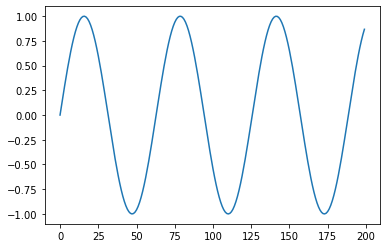

In [3]:
#The first step into creating a synthetic data ~~~ in this case I am generating a sin wave 
series = np.sin(0.1*np.arange(200)) #+np.random.randn(200)*0.1 ~~~ #the second part of the equation is to create noise
# plot the sine wave 
plt.plot(series)
plt.show()


In [6]:
#Build the dataset
T = 10  #T is the time steps, and this code would iterate over 10 steps
X = [] #create an empty list 
Y = []
#populate the X and Y list 
for t in range (len(series) - T):
  x = series [t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print ("X.shape:", X.shape, "Y.shape", Y.shape)



X.shape: (190, 10) Y.shape (190,)


In [8]:
#Code the autoregressive model

i = Input (shape = (T,))
x = Dense (1)(i)
model = Model (i, x)
model.compile(
    loss = 'mse',
    optimizer=Adam(lr=0.1),
)
#train the RNN model
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 38ms/step - loss: 0.1295 - val_loss: 0.0805
Epoch 2/80
3/3 [==============================] - 0s 6ms/step - loss: 0.1303 - val_loss: 0.0088
Epoch 3/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0361 - val_loss: 0.0828
Epoch 4/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0458 - val_loss: 0.0097
Epoch 5/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0363 - val_loss: 0.0222
Epoch 6/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0093 - val_loss: 0.0130
Epoch 7/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0220 - val_loss: 0.0029
Epoch 8/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0148
Epoch 9/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0121 - val_loss: 0.0011
Epoch 10/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0060 - val_loss: 0.0077
Epoch 11/80
3/3 [=====================

<function matplotlib.pyplot.legend>

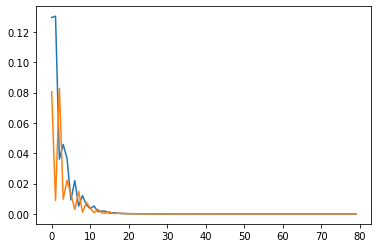

In [9]:
#plot the loss per iteration 
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend

In [10]:
#Now forecasts future values of the sine waves using only self predicted values to make the predictions 
#In this case we are not using values in the dataset to make the forecast, however, we are using the values pre-forecasted by the model to make future predictions 

validation_target = Y[-N//2:]
validation_predictions = []

#last train the input 
last_x = X[-N//2]

while len(validation_predictions)<len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]

  # to update the prediction list 
  validation_predictions.append(p)

  # to generate the new input, shift the next value into the target 
  last_x = np.roll(last_x, -1)
  last_x[-1] = p



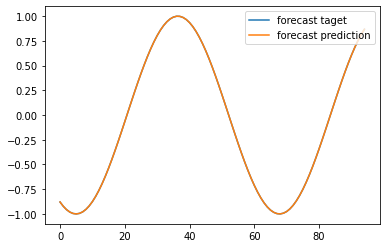

In [11]:
#To plot the prediction against the target and see the performance of the model 

plt.plot(validation_target, label = 'forecast taget')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()